In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
import pandas_profiling as pp

Adapted from: https://medium.com/@williamkoehrsen/data-analysis-with-python-19434f5d6324

In [2]:
# load csv files
batting = pd.read_csv('./core/Batting.csv')
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [3]:
batting_by_years = batting.groupby(['playerID', 'yearID', 'teamID'], as_index=False).sum()
batting_by_years.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,2004,SFN,1,11,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,2006,CHN,1,45,2,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0
2,aardsda01,2007,CHA,1,25,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,2008,BOS,1,47,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,2009,SEA,1,73,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,aardsda01,2010,SEA,1,53,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,aardsda01,2012,NYA,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
7,aardsda01,2013,NYN,1,43,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,aardsda01,2015,ATL,1,33,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
9,aaronha01,1954,ML1,1,122,468,58,131,27,6,13,69.0,2.0,2.0,28,39.0,0.0,3.0,6.0,4.0,13.0


In [4]:
batting_by_years.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,105791.000000,105791.000000,105791.000000,105791.000000,105791.000000,105791.000000,105791.000000,105791.000000,105791.000000,105791.000000,105791.000000,105791.000000,105791.000000,105791.000000,105791.000000,105791.000000,105791.000000,105791.000000,105791.000000
mean,1965.791665,1.079487,51.248225,141.053965,18.706582,36.885973,6.270467,1.272717,2.845091,16.858400,2.906240,0.938104,12.999026,20.182208,0.710533,1.033264,2.124803,0.688130,2.235228
std,39.307588,0.294009,47.060034,184.466952,28.186522,52.481796,9.668968,2.622135,6.355790,26.292799,7.616058,2.448650,20.711675,28.215243,2.283819,2.266601,4.110906,1.659181,4.292984
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1935.000000,1.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1975.000000,1.000000,34.000000,48.000000,4.000000,9.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2000.000000,1.000000,80.000000,229.000000,27.000000,57.000000,9.000000,1.000000,2.000000,24.000000,2.000000,0.000000,18.000000,28.000000,0.000000,1.000000,3.000000,0.000000,2.000000
max,2018.000000,9.000000,165.000000,716.000000,198.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


In [5]:
batting_by_years.shape

(105791, 21)

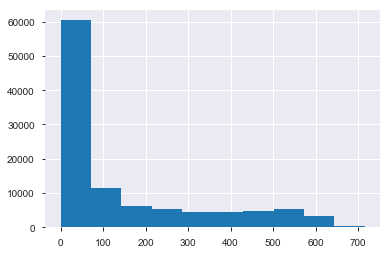

In [6]:
batting_by_years['AB'].hist()

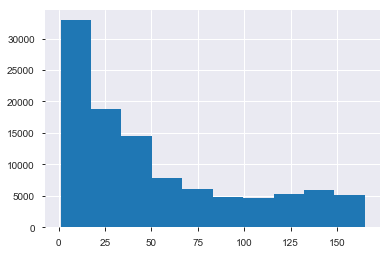

In [7]:
batting_by_years['G'].hist()

In [8]:
# filter to include only players with more than 20 games played and 20 at-bats
batting_by_years = batting_by_years[(batting_by_years['G'] >= 20) & 
                                    (batting_by_years['AB'] >= 20)]
batting_by_years.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
9,aaronha01,1954,ML1,1,122,468,58,131,27,6,13,69.0,2.0,2.0,28,39.0,0.0,3.0,6.0,4.0,13.0
10,aaronha01,1955,ML1,1,153,602,105,189,37,9,27,106.0,3.0,1.0,49,61.0,5.0,3.0,7.0,4.0,20.0
11,aaronha01,1956,ML1,1,153,609,106,200,34,14,26,92.0,2.0,4.0,37,54.0,6.0,2.0,5.0,7.0,21.0
12,aaronha01,1957,ML1,1,151,615,118,198,27,6,44,132.0,1.0,1.0,57,58.0,15.0,0.0,0.0,3.0,13.0
13,aaronha01,1958,ML1,1,153,601,109,196,34,4,30,95.0,4.0,1.0,59,49.0,16.0,1.0,0.0,3.0,21.0
14,aaronha01,1959,ML1,1,154,629,116,223,46,7,39,123.0,8.0,0.0,51,54.0,17.0,4.0,0.0,9.0,19.0
15,aaronha01,1960,ML1,1,153,590,102,172,20,11,40,126.0,16.0,7.0,60,63.0,13.0,2.0,0.0,12.0,8.0
16,aaronha01,1961,ML1,1,155,603,115,197,39,10,34,120.0,21.0,9.0,56,64.0,20.0,2.0,1.0,9.0,16.0
17,aaronha01,1962,ML1,1,156,592,127,191,28,6,45,128.0,15.0,7.0,66,73.0,14.0,3.0,0.0,6.0,14.0
18,aaronha01,1963,ML1,1,161,631,121,201,29,4,44,130.0,31.0,5.0,78,94.0,18.0,0.0,0.0,5.0,11.0


In [9]:
batting_by_years.shape

(57108, 21)

In [10]:
# define a function that makes sure that only players that have at least five years are included
def find_players_with_five_years(records):
    # create list with all playerID's
    list_of_IDs = list(records['playerID'])
    all_years = set()
    
    # iterate through list of ID's and count how many times it occurs in the list
    for player in list_of_IDs:
        if (list_of_IDs.count(player)) >= 5:
            all_years.add(player)
            
    # return dataframe with players in all desired years
    return records[records['playerID'].isin(all_years)]


In [11]:
# create new dataframe using above function
batting_by_years = find_players_with_five_years(batting_by_years)
batting_by_years.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
9,aaronha01,1954,ML1,1,122,468,58,131,27,6,13,69.0,2.0,2.0,28,39.0,0.0,3.0,6.0,4.0,13.0
10,aaronha01,1955,ML1,1,153,602,105,189,37,9,27,106.0,3.0,1.0,49,61.0,5.0,3.0,7.0,4.0,20.0
11,aaronha01,1956,ML1,1,153,609,106,200,34,14,26,92.0,2.0,4.0,37,54.0,6.0,2.0,5.0,7.0,21.0
12,aaronha01,1957,ML1,1,151,615,118,198,27,6,44,132.0,1.0,1.0,57,58.0,15.0,0.0,0.0,3.0,13.0
13,aaronha01,1958,ML1,1,153,601,109,196,34,4,30,95.0,4.0,1.0,59,49.0,16.0,1.0,0.0,3.0,21.0
14,aaronha01,1959,ML1,1,154,629,116,223,46,7,39,123.0,8.0,0.0,51,54.0,17.0,4.0,0.0,9.0,19.0
15,aaronha01,1960,ML1,1,153,590,102,172,20,11,40,126.0,16.0,7.0,60,63.0,13.0,2.0,0.0,12.0,8.0
16,aaronha01,1961,ML1,1,155,603,115,197,39,10,34,120.0,21.0,9.0,56,64.0,20.0,2.0,1.0,9.0,16.0
17,aaronha01,1962,ML1,1,156,592,127,191,28,6,45,128.0,15.0,7.0,66,73.0,14.0,3.0,0.0,6.0,14.0
18,aaronha01,1963,ML1,1,161,631,121,201,29,4,44,130.0,31.0,5.0,78,94.0,18.0,0.0,0.0,5.0,11.0


In [12]:
batting_by_years.shape

(45525, 21)

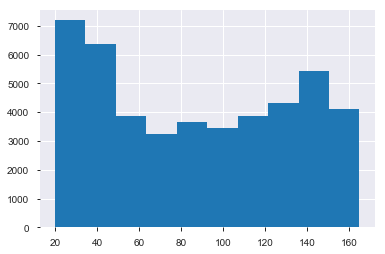

In [13]:
batting_by_years['G'].hist()

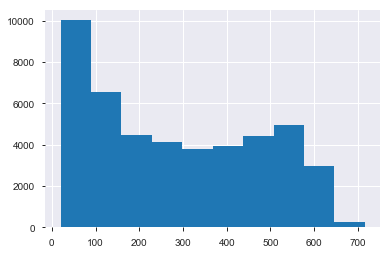

In [14]:
batting_by_years['AB'].hist()

In [16]:
# import people csv
people = pd.read_csv('../baseballdatabank/core/People.csv',
                    usecols=['playerID','nameFirst','nameLast',
                            'bats','throws','debut', 'finalGame'])

In [17]:
# set index so that we can join with batting data
people.set_index('playerID', inplace=True)

In [18]:
# join batting dataframe with other relavent info from people
batting_by_years = batting_by_years.join(people, on='playerID', how='inner')

In [19]:
batting_by_years.isnull().sum()

playerID       0
yearID         0
teamID         0
stint          0
G              0
AB             0
R              0
H              0
2B             0
3B             0
HR             0
RBI            0
SB             0
CS             0
BB             0
SO             0
IBB            0
HBP            0
SH             0
SF             0
GIDP           0
nameFirst      0
nameLast       0
bats         141
throws        85
debut          0
finalGame      0
dtype: int64

In [20]:
# include only players after 1900
batting_by_years = batting_by_years[batting_by_years['yearID'] > 1900]

In [21]:
batting_by_years[batting_by_years['bats'].isnull()]

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,finalGame
24548,dolanjo02,1901,PHA,2,98,338,50,73,21,2,1,38.0,3.0,0.0,26,19.0,0.0,5.0,6.0,0.0,0.0,Joe,Dolan,NaN,R,1896-08-11,1901-09-28
25764,dugglbi01,1901,PHI,1,35,115,10,19,2,1,0,5.0,2.0,0.0,3,29.0,0.0,1.0,3.0,0.0,0.0,Bill,Duggleby,NaN,R,1898-04-21,1907-09-07
25766,dugglbi01,1902,PHI,2,33,98,7,17,5,1,0,4.0,1.0,0.0,3,32.0,0.0,0.0,1.0,0.0,0.0,Bill,Duggleby,NaN,R,1898-04-21,1907-09-07
25767,dugglbi01,1903,PHI,1,36,104,10,24,5,1,0,9.0,0.0,0.0,1,39.0,0.0,1.0,3.0,0.0,0.0,Bill,Duggleby,NaN,R,1898-04-21,1907-09-07
25768,dugglbi01,1904,PHI,1,32,82,7,14,3,0,2,9.0,0.0,0.0,1,25.0,0.0,0.0,2.0,0.0,0.0,Bill,Duggleby,NaN,R,1898-04-21,1907-09-07
25769,dugglbi01,1905,PHI,1,38,101,5,11,5,1,1,6.0,0.0,0.0,5,41.0,0.0,0.0,3.0,0.0,0.0,Bill,Duggleby,NaN,R,1898-04-21,1907-09-07
25770,dugglbi01,1906,PHI,1,43,99,7,14,3,0,2,12.0,0.0,0.0,0,37.0,0.0,0.0,1.0,0.0,0.0,Bill,Duggleby,NaN,R,1898-04-21,1907-09-07
39844,hartbi01,1901,CLE,1,20,64,7,14,0,0,0,6.0,0.0,0.0,1,8.0,0.0,0.0,1.0,0.0,0.0,Bill,Hart,NaN,R,1886-07-26,1901-07-30
88498,smithal01,1901,NY1,1,26,78,5,11,0,0,0,6.0,2.0,0.0,0,4.0,0.0,0.0,1.0,0.0,0.0,Aleck,Smith,NaN,R,1897-04-23,1906-10-05
88499,smithal01,1902,BLA,1,41,145,10,34,3,0,0,21.0,5.0,0.0,8,4.0,0.0,0.0,4.0,0.0,0.0,Aleck,Smith,NaN,R,1897-04-23,1906-10-05


In [22]:
batting_by_years.dropna(inplace=True)

In [23]:
batting_by_years.isnull().sum()

playerID     0
yearID       0
teamID       0
stint        0
G            0
AB           0
R            0
H            0
2B           0
3B           0
HR           0
RBI          0
SB           0
CS           0
BB           0
SO           0
IBB          0
HBP          0
SH           0
SF           0
GIDP         0
nameFirst    0
nameLast     0
bats         0
throws       0
debut        0
finalGame    0
dtype: int64

In [24]:
# Initialize a dictionary
era_dict = {}

# Iterate through `batting_by_years`

# add a count for the number of games played for each player in each era.
for i, row in batting_by_years.iterrows():
    ID = row['playerID']
    year = row['yearID']
    if ID in era_dict:
        
        era_dict[ID]['G'] = era_dict[ID]['G'] + row['G']
    
        if year < 1920:
            era_dict[ID]['pre1920'] = era_dict[ID]['pre1920'] + row['G']
        elif year >= 1920 and year <= 1941:
            era_dict[ID]['1920-41'] = era_dict[ID]['1920-41'] + row['G']
        elif year >= 1942 and year <= 1945:
            era_dict[ID]['1942-45'] = era_dict[ID]['1942-45'] + row['G']
        elif year >= 1946 and year <= 1962:
            era_dict[ID]['1946-62'] = era_dict[ID]['1946-62'] + row['G']
        elif year >= 1963 and year <= 1976:
            era_dict[ID]['1963-76'] = era_dict[ID]['1963-76'] + row['G']
        elif year >= 1977 and year <= 1992:
            era_dict[ID]['1977-92'] = era_dict[ID]['1977-92'] + row['G']
        elif year >= 1993 and year <= 2009:
            era_dict[ID]['1993-2009'] = era_dict[ID]['1993-2009'] + row['G']
        elif year > 2009:
            era_dict[ID]['post2009'] = era_dict[ID]['post2009'] + row['G']
    else:
        era_dict[ID] = {}
        era_dict[ID]['G'] = row['G']
        era_dict[ID]['pre1920'] = 0
        era_dict[ID]['1920-41'] = 0
        era_dict[ID]['1942-45'] = 0
        era_dict[ID]['1946-62'] = 0
        era_dict[ID]['1963-76'] = 0
        era_dict[ID]['1977-92'] = 0
        era_dict[ID]['1993-2009'] = 0
        era_dict[ID]['post2009'] = 0
        if year < 1920:
            era_dict[ID]['pre1920'] = row['G']
        elif year >= 1920 and year <= 1941:
            era_dict[ID]['1920-41'] = row['G']
        elif year >= 1942 and year <= 1945:
            era_dict[ID]['1942-45'] = row['G']
        elif year >= 1946 and year <= 1962:
            era_dict[ID]['1946-62'] = row['G']
        elif year >= 1963 and year <= 1976:
            era_dict[ID]['1963-76'] = row['G']
        elif year >= 1977 and year <= 1992:
            era_dict[ID]['1977-92'] = row['G']
        elif year >= 1993 and year <= 2009:
            era_dict[ID]['1993-2009'] = row['G']
        elif year > 2009:
            era_dict[ID]['post2009'] = row['G']

In [25]:
# convert pos_dict to a dataframe
era_df = pd.DataFrame.from_dict(era_dict, orient='index')
era_df.head()

,G,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009
aaronha01,3298,0,0,0,1350,1948,0,0,0
aaronto01,429,0,0,0,141,288,0,0,0
abbated01,824,824,0,0,0,0,0,0,0
abbotku01,696,0,0,0,0,0,0,696,0
abnersh01,376,0,0,0,0,0,376,0,0


In [26]:
era_df.columns

Index(['G', 'pre1920', '1920-41', '1942-45', '1946-62', '1963-76', '1977-92',
       '1993-2009', 'post2009'],
      dtype='object')

In [27]:
# create list from columns of era_df
era_col_list = era_df.columns.tolist()

In [28]:
# remove G 
era_col_list.remove('G')

In [29]:
# loop through the list and divide each column by the players total games played
for col in era_col_list:
    column = col +'_percent'
    era_df[column] = era_df[col] /era_df['G']
    
era_df.head()

,G,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent
aaronha01,3298,0,0,0,1350,1948,0,0,0,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0
aaronto01,429,0,0,0,141,288,0,0,0,0.0,0.0,0.0,0.328671,0.671329,0.0,0.0,0.0
abbated01,824,824,0,0,0,0,0,0,0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
abbotku01,696,0,0,0,0,0,0,696,0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0
abnersh01,376,0,0,0,0,0,376,0,0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0


In [30]:
era_df.drop(columns='G', inplace=True)

In [31]:
# join era_df and batting_by_years
batting_by_years = batting_by_years.join(era_df, on='playerID', how='right')

In [32]:
batting_by_years.head()

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,finalGame,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent
9,aaronha01,1954,ML1,1,122,468,58,131,27,6,13,69.0,2.0,2.0,28,39.0,0.0,3.0,6.0,4.0,13.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0,0,0,1350,1948,0,0,0,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0
10,aaronha01,1955,ML1,1,153,602,105,189,37,9,27,106.0,3.0,1.0,49,61.0,5.0,3.0,7.0,4.0,20.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0,0,0,1350,1948,0,0,0,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0
11,aaronha01,1956,ML1,1,153,609,106,200,34,14,26,92.0,2.0,4.0,37,54.0,6.0,2.0,5.0,7.0,21.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0,0,0,1350,1948,0,0,0,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0
12,aaronha01,1957,ML1,1,151,615,118,198,27,6,44,132.0,1.0,1.0,57,58.0,15.0,0.0,0.0,3.0,13.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0,0,0,1350,1948,0,0,0,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0
13,aaronha01,1958,ML1,1,153,601,109,196,34,4,30,95.0,4.0,1.0,59,49.0,16.0,1.0,0.0,3.0,21.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0,0,0,1350,1948,0,0,0,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0


In [33]:
# create year_label column to provide info about how
# certain years are related
# dead ball eras, live ball/steriod eras

def assign_label(year):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >= 1942 and year <= 1945:
        return 3
    elif year >= 1946 and year <= 1962:
        return 4
    elif year >= 1963 and year <= 1976:
        return 5
    elif year >= 1977 and year <= 1992:
        return 6
    elif year >= 1993 and year <= 2009:
        return 7
    elif year >= 2010:
        return 8
    

In [34]:
# add year_label column
batting_by_years['year_label'] = batting_by_years['yearID'].apply(assign_label)
batting_by_years.head()

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,finalGame,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,year_label
9,aaronha01,1954,ML1,1,122,468,58,131,27,6,13,69.0,2.0,2.0,28,39.0,0.0,3.0,6.0,4.0,13.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0,0,0,1350,1948,0,0,0,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,4
10,aaronha01,1955,ML1,1,153,602,105,189,37,9,27,106.0,3.0,1.0,49,61.0,5.0,3.0,7.0,4.0,20.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0,0,0,1350,1948,0,0,0,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,4
11,aaronha01,1956,ML1,1,153,609,106,200,34,14,26,92.0,2.0,4.0,37,54.0,6.0,2.0,5.0,7.0,21.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0,0,0,1350,1948,0,0,0,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,4
12,aaronha01,1957,ML1,1,151,615,118,198,27,6,44,132.0,1.0,1.0,57,58.0,15.0,0.0,0.0,3.0,13.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0,0,0,1350,1948,0,0,0,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,4
13,aaronha01,1958,ML1,1,153,601,109,196,34,4,30,95.0,4.0,1.0,59,49.0,16.0,1.0,0.0,3.0,21.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0,0,0,1350,1948,0,0,0,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,4


In [35]:
# create dummies for new column
dummy_df = pd.get_dummies(batting_by_years['year_label'], prefix='era')

In [36]:
# concatenate batting_by_years and dummy_df
batting_by_years = pd.concat([batting_by_years, dummy_df], axis=1)
batting_by_years.head()

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,finalGame,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,year_label,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8
9,aaronha01,1954,ML1,1,122,468,58,131,27,6,13,69.0,2.0,2.0,28,39.0,0.0,3.0,6.0,4.0,13.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0,0,0,1350,1948,0,0,0,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,4,0,0,0,1,0,0,0,0
10,aaronha01,1955,ML1,1,153,602,105,189,37,9,27,106.0,3.0,1.0,49,61.0,5.0,3.0,7.0,4.0,20.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0,0,0,1350,1948,0,0,0,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,4,0,0,0,1,0,0,0,0
11,aaronha01,1956,ML1,1,153,609,106,200,34,14,26,92.0,2.0,4.0,37,54.0,6.0,2.0,5.0,7.0,21.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0,0,0,1350,1948,0,0,0,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,4,0,0,0,1,0,0,0,0
12,aaronha01,1957,ML1,1,151,615,118,198,27,6,44,132.0,1.0,1.0,57,58.0,15.0,0.0,0.0,3.0,13.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0,0,0,1350,1948,0,0,0,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,4,0,0,0,1,0,0,0,0
13,aaronha01,1958,ML1,1,153,601,109,196,34,4,30,95.0,4.0,1.0,59,49.0,16.0,1.0,0.0,3.0,21.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0,0,0,1350,1948,0,0,0,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,4,0,0,0,1,0,0,0,0


In [37]:
# convert years into decade bins and creating dummy variables
def assign_decade(year):
    if year < 1920:
        return 1910
    elif year >= 1920 and year <= 1929:
        return 1920
    elif year >= 1930 and year <= 1939:
        return 1930
    elif year >= 1940 and year <= 1949:
        return 1940
    elif year >= 1950 and year <= 1959:
        return 1950
    elif year >= 1960 and year <= 1969:
        return 1960
    elif year >= 1970 and year <= 1979:
        return 1970
    elif year >= 1980 and year <= 1989:
        return 1980
    elif year >= 1990 and year <= 1999:
        return 1990
    elif year >= 2000 and year <= 2009:
        return 2000
    elif year >= 2010:
        return 2010

In [38]:
batting_by_years['decade_label'] = batting_by_years['yearID'].apply(assign_decade)

In [39]:
# get dummies for decade label
decade_df = pd.get_dummies(batting_by_years['decade_label'], prefix='decade')

In [40]:
batting_by_years = pd.concat([batting_by_years, decade_df], axis=1)
batting_by_years.head()

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,finalGame,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,year_label,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8,decade_label,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010
9,aaronha01,1954,ML1,1,122,468,58,131,27,6,13,69.0,2.0,2.0,28,39.0,0.0,3.0,6.0,4.0,13.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0,0,0,1350,1948,0,0,0,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,4,0,0,0,1,0,0,0,0,1950,0,0,0,0,1,0,0,0,0,0,0
10,aaronha01,1955,ML1,1,153,602,105,189,37,9,27,106.0,3.0,1.0,49,61.0,5.0,3.0,7.0,4.0,20.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0,0,0,1350,1948,0,0,0,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,4,0,0,0,1,0,0,0,0,1950,0,0,0,0,1,0,0,0,0,0,0
11,aaronha01,1956,ML1,1,153,609,106,200,34,14,26,92.0,2.0,4.0,37,54.0,6.0,2.0,5.0,7.0,21.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0,0,0,1350,1948,0,0,0,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,4,0,0,0,1,0,0,0,0,1950,0,0,0,0,1,0,0,0,0,0,0
12,aaronha01,1957,ML1,1,151,615,118,198,27,6,44,132.0,1.0,1.0,57,58.0,15.0,0.0,0.0,3.0,13.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0,0,0,1350,1948,0,0,0,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,4,0,0,0,1,0,0,0,0,1950,0,0,0,0,1,0,0,0,0,0,0
13,aaronha01,1958,ML1,1,153,601,109,196,34,4,30,95.0,4.0,1.0,59,49.0,16.0,1.0,0.0,3.0,21.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0,0,0,1350,1948,0,0,0,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,4,0,0,0,1,0,0,0,0,1950,0,0,0,0,1,0,0,0,0,0,0


In [41]:
batting_by_years.columns

Index(['playerID', 'yearID', 'teamID', 'stint', 'G', 'AB', 'R', 'H', '2B',
       '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF',
       'GIDP', 'nameFirst', 'nameLast', 'bats', 'throws', 'debut', 'finalGame',
       'pre1920', '1920-41', '1942-45', '1946-62', '1963-76', '1977-92',
       '1993-2009', 'post2009', 'pre1920_percent', '1920-41_percent',
       '1942-45_percent', '1946-62_percent', '1963-76_percent',
       '1977-92_percent', '1993-2009_percent', 'post2009_percent',
       'year_label', 'era_1', 'era_2', 'era_3', 'era_4', 'era_5', 'era_6',
       'era_7', 'era_8', 'decade_label', 'decade_1910', 'decade_1920',
       'decade_1930', 'decade_1940', 'decade_1950', 'decade_1960',
       'decade_1970', 'decade_1980', 'decade_1990', 'decade_2000',
       'decade_2010'],
      dtype='object')

In [42]:
batting_by_years.drop(columns=['pre1920', '1920-41', '1942-45', 
                               '1946-62', '1963-76', '1977-92', 
                               '1993-2009', 'post2009', 'decade_label', 
                               'year_label'], inplace=True, axis=1)
batting_by_years.head()

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,finalGame,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010
9,aaronha01,1954,ML1,1,122,468,58,131,27,6,13,69.0,2.0,2.0,28,39.0,0.0,3.0,6.0,4.0,13.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10,aaronha01,1955,ML1,1,153,602,105,189,37,9,27,106.0,3.0,1.0,49,61.0,5.0,3.0,7.0,4.0,20.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
11,aaronha01,1956,ML1,1,153,609,106,200,34,14,26,92.0,2.0,4.0,37,54.0,6.0,2.0,5.0,7.0,21.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
12,aaronha01,1957,ML1,1,151,615,118,198,27,6,44,132.0,1.0,1.0,57,58.0,15.0,0.0,0.0,3.0,13.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
13,aaronha01,1958,ML1,1,153,601,109,196,34,4,30,95.0,4.0,1.0,59,49.0,16.0,1.0,0.0,3.0,21.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [43]:
# create function that converts the bats and throws columns to numeric
def bats_throws(col):
    if col =='R':
        return 1
    else:
        return 0

In [44]:
# convert bats and throws columns
batting_by_years['throws_R'] = batting_by_years['throws'].apply(bats_throws)
batting_by_years['bats_R'] = batting_by_years['bats'].apply(bats_throws)
batting_by_years.head()

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,finalGame,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,throws_R,bats_R
9,aaronha01,1954,ML1,1,122,468,58,131,27,6,13,69.0,2.0,2.0,28,39.0,0.0,3.0,6.0,4.0,13.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
10,aaronha01,1955,ML1,1,153,602,105,189,37,9,27,106.0,3.0,1.0,49,61.0,5.0,3.0,7.0,4.0,20.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
11,aaronha01,1956,ML1,1,153,609,106,200,34,14,26,92.0,2.0,4.0,37,54.0,6.0,2.0,5.0,7.0,21.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
12,aaronha01,1957,ML1,1,151,615,118,198,27,6,44,132.0,1.0,1.0,57,58.0,15.0,0.0,0.0,3.0,13.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
13,aaronha01,1958,ML1,1,153,601,109,196,34,4,30,95.0,4.0,1.0,59,49.0,16.0,1.0,0.0,3.0,21.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1


In [45]:
# create column for batting average
batting_by_years['AVE'] = batting_by_years['H'] / batting_by_years['AB']

In [46]:
# compute plate appearances and on base percentage 
plate_appearances = batting_by_years['AB'] + batting_by_years['BB'] + batting_by_years['SF'] + batting_by_years['HBP']
batting_by_years['OBP'] = (batting_by_years['H'] + batting_by_years['BB'] + batting_by_years['HBP']) / plate_appearances

In [47]:
# create slugging percent column
single = ((batting_by_years['H'] - batting_by_years['2B']) - batting_by_years['3B']) - batting_by_years['HR']
batting_by_years['Slug_Percent'] = ((batting_by_years['HR'] * 4) +
                                        (batting_by_years['3B'] * 3) +
                                        (batting_by_years['2B'] * 2) +
                                        single) / batting_by_years['AB']

In [48]:
# create on base plus slugging percent column
hr = batting_by_years['HR'] * 4
triple = batting_by_years['3B'] * 3
double = batting_by_years['2B'] * 2
batting_by_years['OPS'] = batting_by_years['OBP'] + batting_by_years['Slug_Percent']

In [49]:
batting_by_years.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,finalGame,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS
9,aaronha01,1954,ML1,1,122,468,58,131,27,6,13,69.0,2.0,2.0,28,39.0,0.0,3.0,6.0,4.0,13.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.279915,0.322068,0.446581,0.768649
10,aaronha01,1955,ML1,1,153,602,105,189,37,9,27,106.0,3.0,1.0,49,61.0,5.0,3.0,7.0,4.0,20.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.313953,0.366261,0.539867,0.906129
11,aaronha01,1956,ML1,1,153,609,106,200,34,14,26,92.0,2.0,4.0,37,54.0,6.0,2.0,5.0,7.0,21.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.328407,0.364885,0.558292,0.923178
12,aaronha01,1957,ML1,1,151,615,118,198,27,6,44,132.0,1.0,1.0,57,58.0,15.0,0.0,0.0,3.0,13.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.321951,0.377778,0.600000,0.977778
13,aaronha01,1958,ML1,1,153,601,109,196,34,4,30,95.0,4.0,1.0,59,49.0,16.0,1.0,0.0,3.0,21.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.326123,0.385542,0.545757,0.931299
14,aaronha01,1959,ML1,1,154,629,116,223,46,7,39,123.0,8.0,0.0,51,54.0,17.0,4.0,0.0,9.0,19.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.354531,0.401154,0.635930,1.037084
15,aaronha01,1960,ML1,1,153,590,102,172,20,11,40,126.0,16.0,7.0,60,63.0,13.0,2.0,0.0,12.0,8.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.291525,0.352410,0.566102,0.918511
16,aaronha01,1961,ML1,1,155,603,115,197,39,10,34,120.0,21.0,9.0,56,64.0,20.0,2.0,1.0,9.0,16.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.326700,0.380597,0.593698,0.974295
17,aaronha01,1962,ML1,1,156,592,127,191,28,6,45,128.0,15.0,7.0,66,73.0,14.0,3.0,0.0,6.0,14.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.322635,0.389805,0.618243,1.008048
18,aaronha01,1963,ML1,1,161,631,121,201,29,4,44,130.0,31.0,5.0,78,94.0,18.0,0.0,0.0,5.0,11.0,Hank,Aaron,R,R,1954-04-13,1976-10-03,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.318542,0.390756,0.586371,0.977127


In [50]:
batting_by_years.isnull().sum()

playerID             0
yearID               0
teamID               0
stint                0
G                    0
AB                   0
R                    0
H                    0
2B                   0
3B                   0
HR                   0
RBI                  0
SB                   0
CS                   0
BB                   0
SO                   0
IBB                  0
HBP                  0
SH                   0
SF                   0
GIDP                 0
nameFirst            0
nameLast             0
bats                 0
throws               0
debut                0
finalGame            0
pre1920_percent      0
1920-41_percent      0
1942-45_percent      0
1946-62_percent      0
1963-76_percent      0
1977-92_percent      0
1993-2009_percent    0
post2009_percent     0
era_1                0
era_2                0
era_3                0
era_4                0
era_5                0
era_6                0
era_7                0
era_8                0
decade_1910

In [51]:
from datetime import datetime

In [52]:
# convert debut to datetime
batting_by_years['debut'] = pd.to_datetime(batting_by_years['debut'])
batting_by_years['finalGame'] = pd.to_datetime(batting_by_years['finalGame'])

In [53]:
# create new columns for debutYear and finalYear and current year
batting_by_years['debutYear'] = pd.to_numeric(batting_by_years['debut'].dt.strftime('%Y'), errors='coerce')
batting_by_years['finalGame'] = pd.to_numeric(batting_by_years['finalGame'].dt.strftime('%Y'), errors='coerce')
batting_by_years['currentYear'] = batting_by_years['yearID'] 
batting_by_years.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,finalGame,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear
9,aaronha01,1954,ML1,1,122,468,58,131,27,6,13,69.0,2.0,2.0,28,39.0,0.0,3.0,6.0,4.0,13.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.279915,0.322068,0.446581,0.768649,1954,1954
10,aaronha01,1955,ML1,1,153,602,105,189,37,9,27,106.0,3.0,1.0,49,61.0,5.0,3.0,7.0,4.0,20.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.313953,0.366261,0.539867,0.906129,1954,1955
11,aaronha01,1956,ML1,1,153,609,106,200,34,14,26,92.0,2.0,4.0,37,54.0,6.0,2.0,5.0,7.0,21.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.328407,0.364885,0.558292,0.923178,1954,1956
12,aaronha01,1957,ML1,1,151,615,118,198,27,6,44,132.0,1.0,1.0,57,58.0,15.0,0.0,0.0,3.0,13.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.321951,0.377778,0.600000,0.977778,1954,1957
13,aaronha01,1958,ML1,1,153,601,109,196,34,4,30,95.0,4.0,1.0,59,49.0,16.0,1.0,0.0,3.0,21.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.326123,0.385542,0.545757,0.931299,1954,1958
14,aaronha01,1959,ML1,1,154,629,116,223,46,7,39,123.0,8.0,0.0,51,54.0,17.0,4.0,0.0,9.0,19.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.354531,0.401154,0.635930,1.037084,1954,1959
15,aaronha01,1960,ML1,1,153,590,102,172,20,11,40,126.0,16.0,7.0,60,63.0,13.0,2.0,0.0,12.0,8.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.291525,0.352410,0.566102,0.918511,1954,1960
16,aaronha01,1961,ML1,1,155,603,115,197,39,10,34,120.0,21.0,9.0,56,64.0,20.0,2.0,1.0,9.0,16.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.326700,0.380597,0.593698,0.974295,1954,1961
17,aaronha01,1962,ML1,1,156,592,127,191,28,6,45,128.0,15.0,7.0,66,73.0,14.0,3.0,0.0,6.0,14.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.322635,0.389805,0.618243,1.008048,1954,1962
18,aaronha01,1963,ML1,1,161,631,121,201,29,4,44,130.0,31.0,5.0,78,94.0,18.0,0.0,0.0,5.0,11.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.318542,0.390756,0.586371,0.977127,1954,1963


In [54]:
# create a years in the league up to that point column
batting_by_years['YRSPRO'] = batting_by_years['currentYear'] - batting_by_years['debutYear']

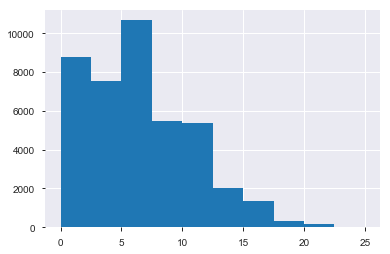

In [55]:
batting_by_years['YRSPRO'].hist()

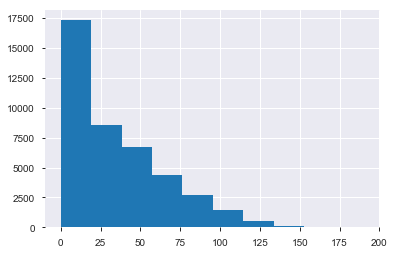

In [56]:
batting_by_years['RBI'].hist()

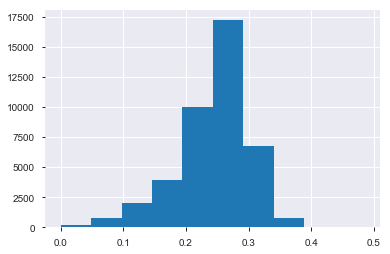

In [57]:
batting_by_years['AVE'].hist()

In [58]:
batting_by_years._get_numeric_data().columns

Index(['yearID', 'stint', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'finalGame',
       'pre1920_percent', '1920-41_percent', '1942-45_percent',
       '1946-62_percent', '1963-76_percent', '1977-92_percent',
       '1993-2009_percent', 'post2009_percent', 'era_1', 'era_2', 'era_3',
       'era_4', 'era_5', 'era_6', 'era_7', 'era_8', 'decade_1910',
       'decade_1920', 'decade_1930', 'decade_1940', 'decade_1950',
       'decade_1960', 'decade_1970', 'decade_1980', 'decade_1990',
       'decade_2000', 'decade_2010', 'throws_R', 'bats_R', 'AVE', 'OBP',
       'Slug_Percent', 'OPS', 'debutYear', 'currentYear', 'YRSPRO'],
      dtype='object')

In [59]:
# create list of columns I want to compute % change
change_cols = ['AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
               'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP',
               'AVE', 'OBP', 'Slug_Percent', 'OPS']


In [60]:
percent_change = batting_by_years.groupby('playerID')[change_cols].pct_change().replace(np.inf, np.nan)
percent_change.head()

,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,AVE,OBP,Slug_Percent,OPS
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0.286325,0.810345,0.442748,0.370370,0.500000,1.076923,0.536232,0.500000,-0.50,0.750000,0.564103,NaN,0.000000,0.166667,0.000000,0.538462,0.121605,0.137219,0.208889,0.178859
11,0.011628,0.009524,0.058201,-0.081081,0.555556,-0.037037,-0.132075,-0.333333,3.00,-0.244898,-0.114754,0.200000,-0.333333,-0.285714,0.750000,0.050000,0.046038,-0.003757,0.034129,0.018816
12,0.009852,0.113208,-0.010000,-0.205882,-0.571429,0.692308,0.434783,-0.500000,-0.75,0.540541,0.074074,1.500000,-1.000000,-1.000000,-0.571429,-0.380952,-0.019659,0.035332,0.074706,0.059144
13,-0.022764,-0.076271,-0.010101,0.259259,-0.333333,-0.318182,-0.280303,3.000000,0.00,0.035088,-0.155172,0.066667,NaN,NaN,0.000000,0.615385,0.012958,0.020553,-0.090405,-0.047535


In [61]:
# combine batting_by_years_agg and percent_change into a single dataframe
batter_and_change = pd.concat([batting_by_years, percent_change.rename(columns={ 
    'AB': 'AB_chg', 
    'R': 'R_chg', 
    'H': 'H_chg', 
    '2B': '2B_chg', 
    '3B': '3B_chg', 
    'HR': 'HR_chg', 
    'RBI': 'RBI_chg', 
    'SB': 'SB_chg',
    'CS': 'CS_chg', 
    'BB': 'BB_chg', 
    'SO': 'SO_chg', 
    'IBB': 'IBB_chg', 
    'HBP': 'HBP_chg', 
    'SH': 'SH_chg', 
    'SF': 'SF_chg', 
    'GIDP': 'GIDP_chg',
    'AVE': 'AVE_chg', 
    'OBP': 'OBP_chg', 
    'Slug_Percent': 'Slug_chg', 
    'OPS': 'OPS_chg'
})], axis=1)

In [62]:
# fill nan values with 0
batter_and_change.fillna(0, inplace=True)

In [63]:
batter_and_change.shape

(41745, 83)

In [64]:
batter_and_change.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,finalGame,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg
9,aaronha01,1954,ML1,1,122,468,58,131,27,6,13,69.0,2.0,2.0,28,39.0,0.0,3.0,6.0,4.0,13.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.279915,0.322068,0.446581,0.768649,1954,1954,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,aaronha01,1955,ML1,1,153,602,105,189,37,9,27,106.0,3.0,1.0,49,61.0,5.0,3.0,7.0,4.0,20.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.313953,0.366261,0.539867,0.906129,1954,1955,1,0.286325,0.810345,0.442748,0.370370,0.500000,1.076923,0.536232,0.500000,-0.500000,0.750000,0.564103,0.000000,0.000000,0.166667,0.000000,0.538462,0.121605,0.137219,0.208889,0.178859
11,aaronha01,1956,ML1,1,153,609,106,200,34,14,26,92.0,2.0,4.0,37,54.0,6.0,2.0,5.0,7.0,21.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.328407,0.364885,0.558292,0.923178,1954,1956,2,0.011628,0.009524,0.058201,-0.081081,0.555556,-0.037037,-0.132075,-0.333333,3.000000,-0.244898,-0.114754,0.200000,-0.333333,-0.285714,0.750000,0.050000,0.046038,-0.003757,0.034129,0.018816
12,aaronha01,1957,ML1,1,151,615,118,198,27,6,44,132.0,1.0,1.0,57,58.0,15.0,0.0,0.0,3.0,13.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.321951,0.377778,0.600000,0.977778,1954,1957,3,0.009852,0.113208,-0.010000,-0.205882,-0.571429,0.692308,0.434783,-0.500000,-0.750000,0.540541,0.074074,1.500000,-1.000000,-1.000000,-0.571429,-0.380952,-0.019659,0.035332,0.074706,0.059144
13,aaronha01,1958,ML1,1,153,601,109,196,34,4,30,95.0,4.0,1.0,59,49.0,16.0,1.0,0.0,3.0,21.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.326123,0.385542,0.545757,0.931299,1954,1958,4,-0.022764,-0.076271,-0.010101,0.259259,-0.333333,-0.318182,-0.280303,3.000000,0.000000,0.035088,-0.155172,0.066667,0.000000,0.000000,0.000000,0.615385,0.012958,0.020553,-0.090405,-0.047535
14,aaronha01,1959,ML1,1,154,629,116,223,46,7,39,123.0,8.0,0.0,51,54.0,17.0,4.0,0.0,9.0,19.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.354531,0.401154,0.635930,1.037084,1954,1959,5,0.046589,0.064220,0.137755,0.352941,0.750000,0.300000,0.294737,1.000000,-1.000000,-0.135593,0.102041,0.062500,3.000000,0.000000,2.000000,-0.095238,0.087108,0.040494,0.165225,0.113589
15,aaronha01,1960,ML1,1,153,590,102,172,20,11,40,126.0,16.0,7.0,60,63.0,13.0,2.0,0.0,12.0,8.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.291525,0.352410,0.566102,0.918511,1954,1960,6,-0.062003,-0.120690,-0.228700,-0.565217,0.571429,0.025641,0.024390,1.000000,0.000000,0.176471,0.166667,-0.235294,-0.500000,0.000000,0.333333,-0.578947,-0.177715,-0.121511,-0.109805,-0.114333
16,aaronha01,1961,ML1,1,155,603,115,197,39,10,34,120.0,21.0,9.0,56,64.0,20.0,2.0,1.0,9.0,16.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.326700,0.380597,0.593698,0.974295,1954,1961,7,0

In [65]:
batter_and_change['finalGame'].value_counts()

2019    1856
2001     709
2014     675
1985     609
2005     608
2007     603
2011     596
2018     577
2013     575
2008     570
2010     544
1986     538
1945     537
2006     536
2016     536
2015     530
1987     527
1995     526
2017     523
1947     513
2003     506
2012     503
2004     501
1989     500
1977     495
1990     477
1992     474
1974     467
1991     458
1988     453
        ... 
1957     234
1921     227
1908     223
1911     221
1932     216
1926     213
1939     212
1942     211
1922     206
1924     198
1931     196
1940     194
1913     193
1944     184
1958     181
1950     177
1910     172
1941     171
1909     157
1914     153
1923     152
1943     152
1912     114
1907     103
1905      77
1906      74
1903      52
1904      22
1902      20
1901      11
Name: finalGame, Length: 119, dtype: int64

In [66]:
batter_and_change['bats_R'].value_counts(normalize=True)

1    0.587759
0    0.412241
Name: bats_R, dtype: float64

In [67]:
batter_and_change._get_numeric_data().columns

Index(['yearID', 'stint', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'finalGame',
       'pre1920_percent', '1920-41_percent', '1942-45_percent',
       '1946-62_percent', '1963-76_percent', '1977-92_percent',
       '1993-2009_percent', 'post2009_percent', 'era_1', 'era_2', 'era_3',
       'era_4', 'era_5', 'era_6', 'era_7', 'era_8', 'decade_1910',
       'decade_1920', 'decade_1930', 'decade_1940', 'decade_1950',
       'decade_1960', 'decade_1970', 'decade_1980', 'decade_1990',
       'decade_2000', 'decade_2010', 'throws_R', 'bats_R', 'AVE', 'OBP',
       'Slug_Percent', 'OPS', 'debutYear', 'currentYear', 'YRSPRO', 'AB_chg',
       'R_chg', 'H_chg', '2B_chg', '3B_chg', 'HR_chg', 'RBI_chg', 'SB_chg',
       'CS_chg', 'BB_chg', 'SO_chg', 'IBB_chg', 'HBP_chg', 'SH_chg', 'SF_chg',
       'GIDP_chg', 'AVE_chg', 'OBP_chg', 'Slug_chg', 'OPS_chg'],
      dtype='object')

In [68]:
# AVE is the target, removed H, G, AB
attributes = ['2B', '3B', 'OPS', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 
              'HBP', 'SH', 'SF', 'GIDP', 'pre1920_percent', '1920-41_percent', 
              '1942-45_percent', '1946-62_percent', '1963-76_percent', 
              '1977-92_percent', '1993-2009_percent', 'post2009_percent', 
              'era_1', 'era_2', 'era_3', 'era_4', 'era_5', 'era_6', 'era_7', 
              'era_8', 'decade_1910', 'decade_1920', 'decade_1930', 'decade_1940', 
              'decade_1950', 'decade_1960', 'decade_1970', 'decade_1980', 
              'decade_1990', 'decade_2000', 'decade_2010', 'throws_R', 'bats_R', 
              'OBP', 'Slug_Percent', 'HR', 'YRSPRO', 
              '2B_chg', '3B_chg', 'OPS_chg', 'RBI_chg', 'SB_chg', 'CS_chg', 
              'BB_chg', 'SO_chg', 'IBB_chg', 'HBP_chg', 'SH_chg', 'SF_chg', 
              'GIDP_chg', 'OBP_chg', 'Slug_chg', 'HR_chg']

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
ss = StandardScaler()
X_sc = ss.fit_transform(batter_and_change[attributes])

C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [71]:
# import kmeans
from sklearn.cluster import KMeans
from sklearn import metrics

In [72]:
# create silhouette score dict
s_score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=42)
    l = km.fit_predict(X_sc)
    s_score = metrics.silhouette_score(X_sc, l)
    s_score_dict[i] = [s_score]
    
s_score_dict

{2: [0.11662097588828557],
 3: [0.09933529273906894],
 4: [0.12264607341024925],
 5: [0.13400743155492606],
 6: [0.14064773681585926],
 7: [0.19480908151986068],
 8: [0.17041285482886281],
 9: [0.18313205198195093],
 10: [0.1897702544425497]}

In [73]:
kmeans_model = KMeans(n_clusters=7, random_state=42)
distances = kmeans_model.fit_transform(X_sc)
labels = kmeans_model.labels_

In [74]:
labels

array([4, 4, 4, ..., 3, 3, 3])

In [75]:
batter_and_change['KMeans_label'] = labels

attributes.append('KMeans_label')

batter_and_change.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,finalGame,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg,KMeans_label
9,aaronha01,1954,ML1,1,122,468,58,131,27,6,13,69.0,2.0,2.0,28,39.0,0.0,3.0,6.0,4.0,13.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.279915,0.322068,0.446581,0.768649,1954,1954,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
10,aaronha01,1955,ML1,1,153,602,105,189,37,9,27,106.0,3.0,1.0,49,61.0,5.0,3.0,7.0,4.0,20.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.313953,0.366261,0.539867,0.906129,1954,1955,1,0.286325,0.810345,0.442748,0.370370,0.500000,1.076923,0.536232,0.500000,-0.500000,0.750000,0.564103,0.000000,0.000000,0.166667,0.000000,0.538462,0.121605,0.137219,0.208889,0.178859,4
11,aaronha01,1956,ML1,1,153,609,106,200,34,14,26,92.0,2.0,4.0,37,54.0,6.0,2.0,5.0,7.0,21.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.328407,0.364885,0.558292,0.923178,1954,1956,2,0.011628,0.009524,0.058201,-0.081081,0.555556,-0.037037,-0.132075,-0.333333,3.000000,-0.244898,-0.114754,0.200000,-0.333333,-0.285714,0.750000,0.050000,0.046038,-0.003757,0.034129,0.018816,4
12,aaronha01,1957,ML1,1,151,615,118,198,27,6,44,132.0,1.0,1.0,57,58.0,15.0,0.0,0.0,3.0,13.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.321951,0.377778,0.600000,0.977778,1954,1957,3,0.009852,0.113208,-0.010000,-0.205882,-0.571429,0.692308,0.434783,-0.500000,-0.750000,0.540541,0.074074,1.500000,-1.000000,-1.000000,-0.571429,-0.380952,-0.019659,0.035332,0.074706,0.059144,4
13,aaronha01,1958,ML1,1,153,601,109,196,34,4,30,95.0,4.0,1.0,59,49.0,16.0,1.0,0.0,3.0,21.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.326123,0.385542,0.545757,0.931299,1954,1958,4,-0.022764,-0.076271,-0.010101,0.259259,-0.333333,-0.318182,-0.280303,3.000000,0.000000,0.035088,-0.155172,0.066667,0.000000,0.000000,0.000000,0.615385,0.012958,0.020553,-0.090405,-0.047535,4
14,aaronha01,1959,ML1,1,154,629,116,223,46,7,39,123.0,8.0,0.0,51,54.0,17.0,4.0,0.0,9.0,19.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.354531,0.401154,0.635930,1.037084,1954,1959,5,0.046589,0.064220,0.137755,0.352941,0.750000,0.300000,0.294737,1.000000,-1.000000,-0.135593,0.102041,0.062500,3.000000,0.000000,2.000000,-0.095238,0.087108,0.040494,0.165225,0.113589,4
15,aaronha01,1960,ML1,1,153,590,102,172,20,11,40,126.0,16.0,7.0,60,63.0,13.0,2.0,0.0,12.0,8.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.291525,0.352410,0.566102,0.918511,1954,1960,6,-0.062003,-0.120690,-0.228700,-0.565217,0.571429,0.025641,0.024390,1.000000,0.000000,0.176471,0.166667,-0.235294,-0.500000,0.000000,0.333333,-0.578947,-0.177715,-0.121511,-0.109805,-0.114333,6
16,aaronha01,1961,ML1,1,155,603,115,197,39,10,34,120.0,21.0,9.0,56,64.0,20.0,2.0,1.0,9.0,16.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.326700,0.380597,0.59

In [76]:
attributes

['2B',
 '3B',
 'OPS',
 'RBI',
 'SB',
 'CS',
 'BB',
 'SO',
 'IBB',
 'HBP',
 'SH',
 'SF',
 'GIDP',
 'pre1920_percent',
 '1920-41_percent',
 '1942-45_percent',
 '1946-62_percent',
 '1963-76_percent',
 '1977-92_percent',
 '1993-2009_percent',
 'post2009_percent',
 'era_1',
 'era_2',
 'era_3',
 'era_4',
 'era_5',
 'era_6',
 'era_7',
 'era_8',
 'decade_1910',
 'decade_1920',
 'decade_1930',
 'decade_1940',
 'decade_1950',
 'decade_1960',
 'decade_1970',
 'decade_1980',
 'decade_1990',
 'decade_2000',
 'decade_2010',
 'throws_R',
 'bats_R',
 'OBP',
 'Slug_Percent',
 'HR',
 'YRSPRO',
 '2B_chg',
 '3B_chg',
 'OPS_chg',
 'RBI_chg',
 'SB_chg',
 'CS_chg',
 'BB_chg',
 'SO_chg',
 'IBB_chg',
 'HBP_chg',
 'SH_chg',
 'SF_chg',
 'GIDP_chg',
 'OBP_chg',
 'Slug_chg',
 'HR_chg',
 'KMeans_label']

In [77]:
batter_and_change['KMeans_label'].value_counts()

1    8487
0    6793
6    6337
4    5864
5    5768
2    4522
3    3974
Name: KMeans_label, dtype: int64

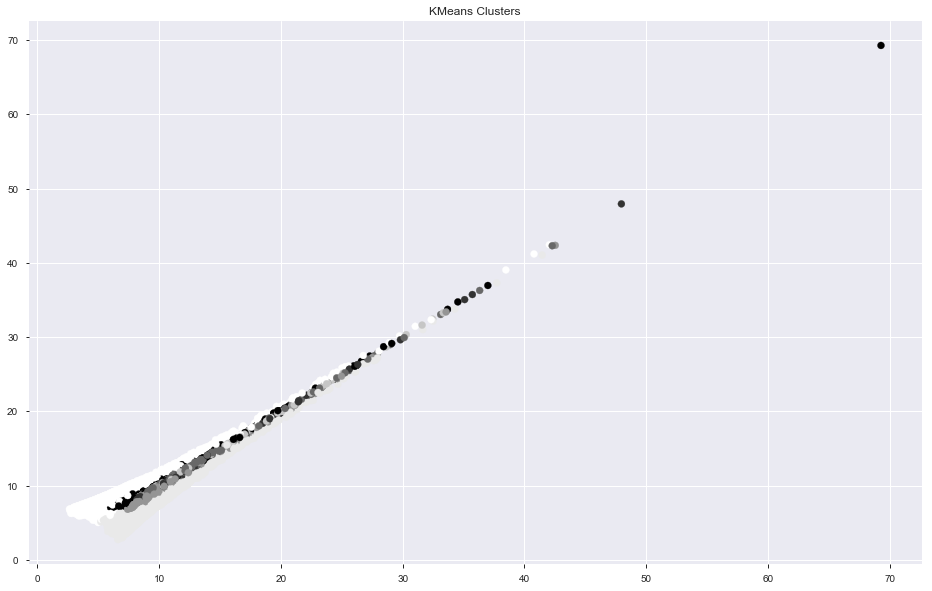

In [78]:
# create a scatter plot using labels from KMeans model as color
plt.figure(figsize=(16,10))
plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.title('KMeans Clusters')

plt.show()

In [79]:
batter_and_change['yearID'].value_counts()

2000    529
2011    520
2010    519
2003    516
2012    516
2006    515
2001    514
2007    511
2002    506
1998    504
2004    503
2009    498
1999    496
1997    494
2008    493
1996    492
2014    490
2013    487
2005    483
1995    466
1989    464
1988    463
2015    455
1990    454
1991    454
1984    450
1971    450
1985    450
1993    450
1969    450
       ... 
1927    267
1924    267
1917    267
1931    266
1938    266
1935    264
1936    263
1942    263
1919    263
1913    258
1922    257
1921    254
1923    253
1943    252
1912    252
1920    250
1910    243
1911    236
1909    232
1908    229
1918    222
1944    216
1904    211
1905    211
1906    208
1907    208
1902    202
1903    202
1945    197
1901    190
Name: yearID, Length: 118, dtype: int64

In [80]:
# filter to find last year in dataframe for each player
last_year_df = batter_and_change[batter_and_change['finalGame'] == batter_and_change['currentYear']]
last_year_df.head()

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,finalGame,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg,KMeans_label
31,aaronha01,1976,ML4,1,85,271,22,62,8,0,10,35.0,0.0,1.0,35,38.0,1.0,0.0,0.0,2.0,8.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0.228782,0.314935,0.369004,0.683939,1954,1976,22,-0.417204,-0.511111,-0.431193,-0.500,-1.0,-0.166667,-0.416667,0.000000,0.0,-0.500000,-0.254902,-0.666667,-1.0,-1.0,-0.666667,-0.466667,-0.024002,-0.051696,0.039919,-0.004372,6
38,aaronto01,1971,ATL,1,25,53,4,12,2,0,0,3.0,0.0,0.0,3,5.0,1.0,0.0,0.0,0.0,3.0,Tommie,Aaron,R,R,1962-04-10,1971,0.0,0.0,0.0,0.328671,0.671329,0.0,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0.226415,0.267857,0.264151,0.532008,1962,1971,9,-0.158730,0.333333,-0.076923,0.000,0.0,-1.000000,-0.571429,0.000000,0.0,0.000000,-0.500000,0.000000,0.0,0.0,0.000000,-0.400000,0.097242,0.104911,-0.207547,-0.075986,6
74,abbated01,1910,BSN,2,52,178,20,44,4,2,0,10.0,2.0,0.0,12,16.0,0.0,0.0,8.0,0.0,0.0,Ed,Abbaticchio,R,R,1897-09-04,1910,1.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.247191,0.294737,0.292135,0.586872,1897,1910,13,1.045977,0.538462,1.200000,0.000,0.0,-1.000000,-0.375000,0.000000,0.0,-0.368421,0.454545,0.000000,0.0,7.0,0.000000,0.000000,0.075281,-0.198920,0.105032,-0.071835,2
198,abnersh01,1992,CHA,1,97,208,21,58,10,1,1,16.0,1.0,2.0,12,35.0,2.0,3.0,2.0,3.0,3.0,Shawn,Abner,R,R,1987-09-08,1992,0.0,0.0,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0.278846,0.323009,0.350962,0.673970,1987,1992,5,0.808696,0.400000,2.052632,1.500,0.0,0.000000,2.200000,0.000000,0.0,0.714286,0.400000,-0.500000,2.0,1.0,2.000000,0.000000,0.687753,0.483448,0.441449,0.461277,0
230,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,Bobby,Abreu,L,R,1996-09-01,2014,0.0,0.0,0.0,0.000000,0.000000,0.0,0.805995,0.194005,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0.248120,0.341935,0.338346,0.680281,1996,2014,18,-0.317949,-0.571429,-0.312500,0.125,-1.0,-0.666667,-0.263158,-0.833333,-1.0,-0.428571,-0.588235,-1.000000,0.0,0.0,0.000000,-0.500000,0.007989,-0.052468,-0.015262,-0.034321,3


In [81]:
# filter to find all other years in dataframe for each player
previous_years = batter_and_change[batter_and_change['finalGame'] != batter_and_change['currentYear']]
previous_years.head()

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,finalGame,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg,KMeans_label
9,aaronha01,1954,ML1,1,122,468,58,131,27,6,13,69.0,2.0,2.0,28,39.0,0.0,3.0,6.0,4.0,13.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.279915,0.322068,0.446581,0.768649,1954,1954,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
10,aaronha01,1955,ML1,1,153,602,105,189,37,9,27,106.0,3.0,1.0,49,61.0,5.0,3.0,7.0,4.0,20.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.313953,0.366261,0.539867,0.906129,1954,1955,1,0.286325,0.810345,0.442748,0.370370,0.500000,1.076923,0.536232,0.500000,-0.50,0.750000,0.564103,0.000000,0.000000,0.166667,0.000000,0.538462,0.121605,0.137219,0.208889,0.178859,4
11,aaronha01,1956,ML1,1,153,609,106,200,34,14,26,92.0,2.0,4.0,37,54.0,6.0,2.0,5.0,7.0,21.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.328407,0.364885,0.558292,0.923178,1954,1956,2,0.011628,0.009524,0.058201,-0.081081,0.555556,-0.037037,-0.132075,-0.333333,3.00,-0.244898,-0.114754,0.200000,-0.333333,-0.285714,0.750000,0.050000,0.046038,-0.003757,0.034129,0.018816,4
12,aaronha01,1957,ML1,1,151,615,118,198,27,6,44,132.0,1.0,1.0,57,58.0,15.0,0.0,0.0,3.0,13.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.321951,0.377778,0.600000,0.977778,1954,1957,3,0.009852,0.113208,-0.010000,-0.205882,-0.571429,0.692308,0.434783,-0.500000,-0.75,0.540541,0.074074,1.500000,-1.000000,-1.000000,-0.571429,-0.380952,-0.019659,0.035332,0.074706,0.059144,4
13,aaronha01,1958,ML1,1,153,601,109,196,34,4,30,95.0,4.0,1.0,59,49.0,16.0,1.0,0.0,3.0,21.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.326123,0.385542,0.545757,0.931299,1954,1958,4,-0.022764,-0.076271,-0.010101,0.259259,-0.333333,-0.318182,-0.280303,3.000000,0.00,0.035088,-0.155172,0.066667,0.000000,0.000000,0.000000,0.615385,0.012958,0.020553,-0.090405,-0.047535,4


In [82]:
last_year_df[attributes].shape

(2837, 63)

Save compiled dataframes for use later

In [83]:
# batter_and_change.to_csv('batter_and_change_FINAL.csv')

In [84]:
# previous_years.to_csv('previous_years_FINAL.csv')

In [85]:
# last_year_df.to_csv('last_year_df_FINAL.csv')

Modeling

In [86]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [87]:
# imports
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [89]:
# set X and y
X = previous_years[attributes]
y = previous_years['AVE']

Linear Regression

In [90]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [87]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.9245850874144554


In [88]:
# gridsearch for best parameters

gs_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

lr_gridsearch = GridSearchCV(
    LinearRegression(),
    gs_params,
    cv=5,
    n_jobs=4,
    verbose=1
)

In [89]:
lr_gridsearch = lr_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    4.7s finished


In [90]:
# Best parameters on the training data:
lr_gridsearch.best_params_

{'fit_intercept': True, 'normalize': False}

In [91]:
# accuracy score on train data
lr_train = lr_gridsearch.best_score_
print(lr_train)

# assign the best estimator to a variable:
best_lr = lr_gridsearch.best_estimator_

# accuracy score on test data
lr_test = best_lr.score(X_test, y_test)
print(lr_test)

0.9268947349293287
0.9245850874144554


In [137]:
# #serializing the model to a file 
# import pickle
# pickle.dump(best_lr, open("lr_AVE.pkl","wb"))

In [91]:
# unseen data
X_final = last_year_df[attributes]

In [93]:
lrpreds = best_lr.predict(X_final)

In [94]:
# find the root mean squared error
mse = mean_squared_error(last_year_df['AVE'], lrpreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
lr_score = rmse

RMSE: 0.022072780140648625


In [95]:
lrpreds

array([0.23622451, 0.20696997, 0.2330002 , ..., 0.12593351, 0.24326018,
       0.23069646])

In [96]:
# accuracy score on new data
lr_test_new = best_lr.score(X_final, last_year_df['AVE'])
print(lr_test_new)

0.8157356416523764


In [97]:
results = pd.DataFrame()
results['y_true'] = last_year_df['AVE']
results['lrpreds'] = lrpreds
results.head()

,y_true,lrpreds
31,0.228782,0.236225
38,0.226415,0.206970
74,0.247191,0.233000
198,0.278846,0.260797
230,0.248120,0.254306


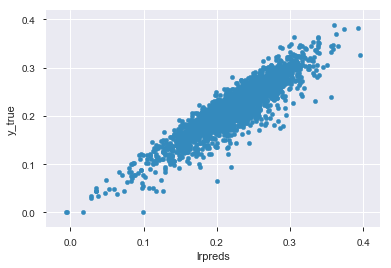

In [98]:
results.plot('lrpreds', 'y_true', kind='scatter')

Ridge

In [92]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
X_final_poly = poly.fit_transform(X_final)

In [93]:
ss = StandardScaler()
X_train_poly_sc = ss.fit_transform(X_train_poly)
X_test_poly_sc = ss.fit_transform(X_test_poly)
X_final_poly_sc = ss.fit_transform(X_final_poly)

In [101]:
ridge = Ridge()
ridge.fit(X_train_poly_sc, y_train)
print(ridge.score(X_test_poly_sc, y_test))

0.9501996596045186


In [102]:
# gridsearch for best parameters

gs_params = {
    'alpha': [0.1, 1, 10, 100],
    'fit_intercept': [True, False],
}

ridge_gridsearch = GridSearchCV(
    Ridge(),
    gs_params,
    cv=5,
    n_jobs=4,
    verbose=1
)

In [103]:
ridge_gridsearch = ridge_gridsearch.fit(X_train_poly_sc, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:  3.7min finished


In [104]:
# Best parameters on the training data:
ridge_gridsearch.best_params_

{'alpha': 1, 'fit_intercept': True, 'normalize': False}

In [105]:
# accuracy score on train data
ridge_train = ridge_gridsearch.best_score_
print(ridge_train)

# assign the best estimator to a variable:
best_ridge = ridge_gridsearch.best_estimator_

# accuracy score on test data
ridge_test = best_ridge.score(X_test_poly_sc, y_test)
print(ridge_test)

0.9574088590977509
0.9501996596045186


In [138]:
# #serializing the model to a file 

# pickle.dump(best_ridge, open("ridge_AVE.pkl","wb"))

In [106]:
ridgepreds = best_ridge.predict(X_final_poly_sc)

In [107]:
# find the root mean squared error
mse = mean_squared_error(last_year_df['AVE'], ridgepreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
ridge_score = rmse

RMSE: 0.03238655035009958


In [108]:
results['ridgepreds'] = ridgepreds
results.head()

,y_true,lrpreds,ridgepreds
31,0.228782,0.236225,0.221966
38,0.226415,0.206970,0.243131
74,0.247191,0.233000,0.251263
198,0.278846,0.260797,0.299484
230,0.248120,0.254306,0.269526


In [109]:
# accuracy score on new data
ridge_test_new = best_ridge.score(X_final_poly_sc, last_year_df['AVE'])
print(ridge_test_new)

0.603305072193459


Lasso

In [110]:
lasso = Lasso()
lasso.fit(X_train_poly_sc, y_train)
print(lasso.score(X_test_poly_sc, y_test))

-0.00030150410908080794


In [111]:
# gridsearch for best parameters

gs_params = {
    'alpha': [0.001, 0.01, 0.1],
    'fit_intercept': [True, False],
    'max_iter': [50, 500, 1000]
}

lasso_gridsearch = GridSearchCV(
    Lasso(),
    gs_params,
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [112]:
lasso_gridsearch = lasso_gridsearch.fit(X_train_poly_sc, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  8.5min finished
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [113]:
# Best parameters on the training data:
lasso_gridsearch.best_params_

{'alpha': 0.001, 'fit_intercept': True, 'max_iter': 50, 'normalize': False}

In [114]:
# accuracy score on train data
lasso_train = lasso_gridsearch.best_score_
print(lasso_train)

# assign the best estimator to a variable:
best_lasso = lasso_gridsearch.best_estimator_

# accuracy score on test data
lasso_test = best_lasso.score(X_test_poly_sc, y_test)
print(lasso_test)

0.9166067279482465
0.9140641297211587


In [139]:
# #serializing the model to a file 

# pickle.dump(best_lasso, open("lasso_AVE.pkl","wb"))

In [115]:
lassopreds = best_lasso.predict(X_final_poly_sc)

In [116]:
# find the root mean squared error
mse = mean_squared_error(last_year_df['AVE'], lassopreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
lasso_score = rmse

RMSE: 0.03298153698364595


In [117]:
# accuracy score on new data
lasso_test_new = best_lasso.score(X_final_poly_sc, last_year_df['AVE'])
print(lasso_test_new)

0.5885954929121789


In [118]:
results['lassopreds'] = lassopreds
results.head(20)

,y_true,lrpreds,ridgepreds,lassopreds
31,0.228782,0.236225,0.221966,0.246778
38,0.226415,0.206970,0.243131,0.223085
74,0.247191,0.233000,0.251263,0.248825
198,0.278846,0.260797,0.299484,0.284035
230,0.248120,0.254306,0.269526,0.279543
308,0.147541,0.157368,0.135433,0.167417
397,0.232759,0.216747,0.249214,0.229098
424,0.247253,0.254618,0.276072,0.280254
439,0.257576,0.244615,0.285110,0.263812
505,0.251799,0.244209,0.257497,0.267144


Elastic Net

In [119]:
enet = ElasticNet()
enet.fit(X_train_poly_sc, y_train)
print(enet.score(X_test_poly_sc, y_test))

-0.00030150410908080794


In [124]:
# gridsearch for best parameters

gs_params = {
    'alpha': [0.001, 0.01, 0.1],
    'l1_ratio': [0.1, 0.5, 0.9],
    'fit_intercept': [True, False],
    'max_iter': [500, 1000, 10000]
}

enet_gridsearch = GridSearchCV(
    ElasticNet(),
    gs_params,
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [125]:
enet_gridsearch = enet_gridsearch.fit(X_train_poly_sc, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 33.7min finished
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [126]:
# Best parameters on the training data:
enet_gridsearch.best_params_

{'alpha': 0.001, 'fit_intercept': True, 'l1_ratio': 0.1, 'max_iter': 1000}

In [127]:
# accuracy score on train data
enet_train = enet_gridsearch.best_score_
print(enet_train)

# assign the best estimator to a variable:
best_enet = enet_gridsearch.best_estimator_

# accuracy score on test data
enet_test = best_enet.score(X_test_poly_sc, y_test)
print(enet_test)

0.9461276550451828
0.9453456477932288


In [140]:
# #serializing the model to a file 

# pickle.dump(best_enet, open("enet_AVE.pkl","wb"))

In [128]:
enetpreds = best_enet.predict(X_final_poly_sc)

In [129]:
# find the root mean squared error
mse = mean_squared_error(last_year_df['AVE'], enetpreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
enet_score = rmse

RMSE: 0.030976570580385922


In [130]:
# accuracy score on new data
enet_test_new = best_enet.score(X_final_poly_sc, last_year_df['AVE'])
print(enet_test_new)

0.6370941785539136


In [131]:
results['enetpreds'] = enetpreds
results.head(20)

,y_true,lrpreds,ridgepreds,lassopreds,enetpreds
31,0.228782,0.236225,0.221966,0.246778,0.236288
38,0.226415,0.206970,0.243131,0.223085,0.228791
74,0.247191,0.233000,0.251263,0.248825,0.255406
198,0.278846,0.260797,0.299484,0.284035,0.297673
230,0.248120,0.254306,0.269526,0.279543,0.278322
308,0.147541,0.157368,0.135433,0.167417,0.152188
397,0.232759,0.216747,0.249214,0.229098,0.245523
424,0.247253,0.254618,0.276072,0.280254,0.275301
439,0.257576,0.244615,0.285110,0.263812,0.275580
505,0.251799,0.244209,0.257497,0.267144,0.266689


Random Forest

In [96]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor

In [97]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_poly, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [98]:
print(rf.score(X_train_poly, y_train))
print(rf.score(X_test_poly, y_test))

0.9935941144091776
0.9543081856108968


In [99]:
# # accuracy score on train data
rf_train = rf.score(X_train_poly, y_train)
print(rf_train)

# # assign the best estimator to a variable:
# best_enet = enet_gridsearch.best_estimator_

# # accuracy score on test data
rf_test = rf.score(X_test_poly, y_test)
print(rf_test)

0.9935941144091776
0.9543081856108968


In [100]:
rfpreds = rf.predict(X_final_poly)

In [101]:
# find the root mean squared error
mse = mean_squared_error(last_year_df['AVE'], rfpreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
rf_score = rmse

RMSE: 0.016747452199047858


In [102]:
# accuracy score on new data
rf_test_new = rf.score(X_final_poly, last_year_df['AVE'])
print(rf_test_new)

0.893922137971072


In [105]:
# #serializing the model to a file 
import pickle
# pickle.dump(rf, open("rf_AVE.pkl","wb"))

In [118]:
results['rfpreds'] = rfpreds
results.head(20)

,y_true,lrpreds,ridgepreds,lassopreds,enetpreds,rfpreds
31,0.228782,0.236225,0.221966,0.246778,0.236288,0.232483
38,0.226415,0.206970,0.243131,0.223085,0.228791,0.219848
74,0.247191,0.233000,0.251263,0.248825,0.255406,0.236922
198,0.278846,0.260797,0.299484,0.284035,0.297673,0.266149
230,0.248120,0.254306,0.269526,0.279543,0.278322,0.258158
308,0.147541,0.157368,0.135433,0.167417,0.152188,0.145201
397,0.232759,0.216747,0.249214,0.229098,0.245523,0.216398
424,0.247253,0.254618,0.276072,0.280254,0.275301,0.246262
439,0.257576,0.244615,0.285110,0.263812,0.275580,0.246334
505,0.251799,0.244209,0.257497,0.267144,0.266689,0.237981


In [119]:
# function to display RMSE and Train and Test R2 scores

def rmse_scores(lr_score, ridge_score, lasso_score, enet_score,
               lr_train, lr_test, ridge_train, ridge_test, 
                lasso_train, lasso_test, enet_train, enet_test, 
                rf_score, rf_train, rf_test, lr_test_new, ridge_test_new, 
                lasso_test_new, enet_test_new, rf_test_new):
    
    print(f'Linear Regression Train R2 Score: {lr_train}')
    print(f'Linear Regression Test R2 Score: {lr_test}')
    print(f'Ridge Train R2 Score: {ridge_train}')
    print(f'Ridge Test R2 Score: {ridge_test}')
    print(f'Lasso Train R2 Score: {lasso_train}')
    print(f'Lasso Test R2 Score: {lasso_test}')
    print(f'ElasticNet Train R2 Score: {enet_train}')
    print(f'ElasticNet Test R2 Score: {enet_test}')
    print(f'Random Forest Train R2 Score: {rf_train}')
    print(f'Random Forest Test R2 Score: {rf_test}')
    print(f'Linear Regression RMSE on New Data: {lr_score}')
    print(f'Ridge RMSE on New Data: {ridge_score}')
    print(f'Lasso RMSE on New Data: {lasso_score}')
    print(f'ElasticNet RMSE on New Data: {enet_score}')
    print(f'Random Forest RMSE on New Data: {rf_score}')
    print(f'Linear Regression R2 Score on New Data: {lr_test_new}') 
    print(f'Ridge R2 Score on New Data: {ridge_test_new}')  
    print(f'Lasso R2 Score on New Data: {lasso_test_new}')
    print(f'ElasticNet R2 Score on New Data: {enet_test_new}')
    print(f'Random Forest R2 Score on New Data: {rf_test_new}')
    return

In [120]:
rmse_scores(lr_score, ridge_score, lasso_score, enet_score,
            lr_train, lr_test, ridge_train, ridge_test, 
            lasso_train, lasso_test, enet_train, enet_test, rf_score, 
            rf_train, rf_test, lr_test_new, ridge_test_new, 
            lasso_test_new, enet_test_new, rf_test_new)

Linear Regression Train R2 Score: 0.927265749628238
Linear Regression Test R2 Score: 0.9245850874144554
Ridge Train R2 Score: 0.9641036826810402
Ridge Test R2 Score: 0.9501996596045186
Lasso Train R2 Score: 0.9167955525718006
Lasso Test R2 Score: 0.9140641297211587
ElasticNet Train R2 Score: 0.9471689658637862
ElasticNet Test R2 Score: 0.9453456477932288
Random Forest Train R2 Score: 0.9935941144091776
Random Forest Test R2 Score: 0.9543081856108968
Linear Regression RMSE on New Data: 0.022072780140648625
Ridge RMSE on New Data: 0.03238655035009958
Lasso RMSE on New Data: 0.03298153698364595
ElasticNet RMSE on New Data: 0.030976570580385922
Random Forest RMSE on New Data: 0.016747452199047858
Linear Regression R2 Score on New Data: 0.8157356416523764
Ridge R2 Score on New Data: 0.603305072193459
Lasso R2 Score on New Data: 0.5885954929121789
ElasticNet R2 Score on New Data: 0.6370941785539136
Random Forest R2 Score on New Data: 0.893922137971072


In [122]:
# add names to results
results['playerID'] = last_year_df['playerID']
results['nameFirst'] = last_year_df['nameFirst']
results['nameLast'] = last_year_df['nameLast']
results.head(20)

,y_true,lrpreds,ridgepreds,lassopreds,enetpreds,rfpreds,playerID,nameFirst,nameLast
31,0.228782,0.236225,0.221966,0.246778,0.236288,0.232483,aaronha01,Hank,Aaron
38,0.226415,0.206970,0.243131,0.223085,0.228791,0.219848,aaronto01,Tommie,Aaron
74,0.247191,0.233000,0.251263,0.248825,0.255406,0.236922,abbated01,Ed,Abbaticchio
198,0.278846,0.260797,0.299484,0.284035,0.297673,0.266149,abnersh01,Shawn,Abner
230,0.248120,0.254306,0.269526,0.279543,0.278322,0.258158,abreubo01,Bobby,Abreu
308,0.147541,0.157368,0.135433,0.167417,0.152188,0.145201,ackledu01,Dustin,Ackley
397,0.232759,0.216747,0.249214,0.229098,0.245523,0.216398,adamsbe01,Bert,Adams
424,0.247253,0.254618,0.276072,0.280254,0.275301,0.246262,adamsbu01,Buster,Adams
439,0.257576,0.244615,0.285110,0.263812,0.275580,0.246334,adamsgl01,Glenn,Adams
505,0.251799,0.244209,0.257497,0.267144,0.266689,0.237981,adamssp01,Sparky,Adams


In [123]:
# save results to a csv
# results.to_csv('model_AVE_results_FINAL.csv')